# Lecture 08
## The transportation problem

In [1]:
import numpy as np
from scipy.optimize import linprog

# Define parameters
m = 2
n = 3

p = np.array([40,20])
q = np.array([25,10,25])

C = np.array([[550,300,400],
              [350,300,100]])

# Vectorize matrix C
C_vec = C.reshape((m*n, 1))

print(C_vec)

[[550]
 [300]
 [400]
 [350]
 [300]
 [100]]


In [5]:
import cvxpy as cvx


# Variables
xa1 = cvx.Variable(name="xa1")
xa2 = cvx.Variable(name="xa2")
xa3 = cvx.Variable(name="xa3")
xb1 = cvx.Variable(name="xb1")
xb2 = cvx.Variable(name="xb2")
xb3 = cvx.Variable(name="xb3")


# Objective function
obj = cvx.Minimize(C_vec[0]*xa1 + C_vec[1]*xa2 + C_vec[2]*xa3 +
                   C_vec[3]*xb1 + C_vec[4]*xb2 + C_vec[5]*xb3)

#Constraint
constraints = [xa1 + xa2 + xa3 == p[0],
               xb1 + xb2 + xb3 == p[1],
               xa1 + xb1 == q[0],
               xa2 + xb2 == q[1],
               xa3 + xb3 == q[2],
               xa1>=0, xa2 >= 0 , xa3>= 0,
               xb1>=0, xb2>=0, xb3>=0]

#Solving the problem
prob = cvx.Problem(obj, constraints)
prob.solve()

#Printing the results
print('Objective = %f' % obj.value)
print('xa1 = %f' % xa1.value)
print('xa2 = %f' % xa2.value)
print('xa3 = %f' % xa3.value)

print('xb1 = %f' % xb1.value)
print('xb2 = %f' % xb2.value)
print('xb3 = %f' % xb3.value)



Objective = 20750.000004
xa1 = 25.000000
xa2 = 10.000000
xa3 = 5.000000
xb1 = 0.000000
xb2 = 0.000000
xb3 = 20.000000


## Flow problem (modified Exercise 3.17 from Loucks and van Beek) - no return flows

In [36]:
#Flow problem

#variables

x01 = cvx.Variable(name="x01")
x1d1 = cvx.Variable(name="x1d1")
x12 = cvx.Variable(name="x1d")
x2d2 = cvx.Variable(name="x2d2")
x23 = cvx.Variable(name="x23")
x3d3 = cvx.Variable(name="x3d3")
x3envf = cvx.Variable(name="x2envf")
x3excess = cvx.Variable(name="x3excess")

#Objective flow (demands)
d1 = 30
d2 = 40
d3 = 20
envd = 10

#Costs (priorities)
cd1 = 2
cd2 = 1
cd3 = 3
cenv = 4



# Objective function
obj = cvx.Minimize(cenv * (envd - x3envf) + cd3* ( d3 - x3d3) + cd1 * (d1 - x1d1) + cd2 * (d2 -x2d2))

#Constraints using fixed inflow
constraints = [x01 == 15,
               x01 == x1d1 + x12,
               x12 == x2d2 + x23,
               x23 == x3d3 + x3envf + x3excess,
               x01 >=0, 
               x1d1 >=0, x1d1 <= d1,
               x12 >=0,
               x2d2 >=0, x2d2 <= d2,
               x23 >=0,
               x3d3 >=0, x3d3 <= d3,
               x3envf >=0, x3envf<=envd,
               x3excess >=0]

#Solving the problem
prob = cvx.Problem(obj, constraints)
prob.solve()

#Printing the results
print('Objective = %f' % obj.value)
print('x01 = %f' % x01.value)
print('x1d1 = %f' % x1d1.value)
print('x12 = %f' % x12.value)

print('x2d2 = %f' % x2d2.value)
print('x23 = %f' % x23.value)
print('x3d3 = %f' % x3d3.value)

print('x3envf = %f' % x3envf.value)
print('x3excess = %f' % x3excess.value)




Objective = 145.000000
x01 = 15.000000
x1d1 = 0.000000
x12 = 15.000000
x2d2 = 0.000000
x23 = 15.000000
x3d3 = 5.000000
x3envf = 10.000000
x3excess = -0.000000


## Flow example using a function (with the inflow as a parameter)

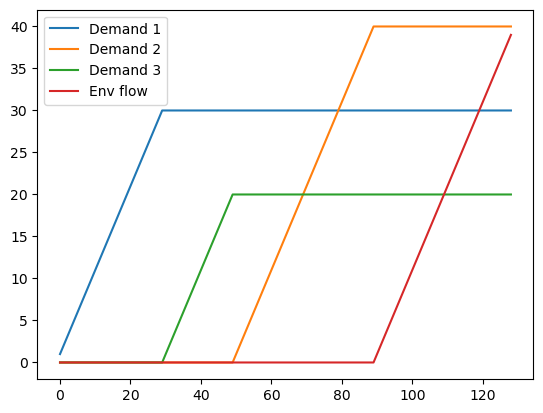

In [19]:
#variables = 

x01 = cvx.Variable(name="x01")
x1d1 = cvx.Variable(name="x1d1")
x12 = cvx.Variable(name="x1d")
x2d2 = cvx.Variable(name="x2d2")
x23 = cvx.Variable(name="x23")
x3d3 = cvx.Variable(name="x3d3")
x3envf = cvx.Variable(name="x3envf")
x3excess = cvx.Variable(name="x3excess")

#Maximum demands
d1 = 30
d2 = 40
d3 =20
envd =10


#priorities
c1 = 50
c2 = 10
c3 = 30
cenv = 5

def calc_flows(inflow):
    #obj function
    # Objective function
    obj = cvx.Minimize(cenv * (envd - x3envf) 
                       + c3* ( d3 - x3d3) 
                       + c1 * (d1 - x1d1) 
                       + c2 * (d2 -x2d2))


    #Constraints
    constraints = [x01 == inflow,
                   x01 == x1d1 + x12,
                   x12 == x2d2 + x23,
                   x23 == x3d3 + x3envf + x3excess,
                   x01 >=0, 
                   x1d1 >=0, x1d1 <= d1,
                   x12 >=0,
                   x2d2 >=0, x2d2 <= d2,
                   x23 >=0,
                   x3d3 >=0, x3d3 <= d3,
                   x3envf >=0, x3envf<=envd,
                   x3excess >=0]

    #Solving the problem
    prob = cvx.Problem(obj, constraints)
    prob.solve()
    
    return(x1d1.value, x2d2.value, x3d3.value, x3envf.value, x3excess.value)
    

flows = []
for i in np.arange(1,130):
    flows.append(calc_flows(i))

import pandas as pd
df = pd.DataFrame(flows)

import matplotlib.pyplot as plt

plt.plot(df.index, df[0], label = "Demand 1")
plt.plot(df.index, df[1], label = "Demand 2")
plt.plot(df.index, df[2], label = "Demand 3")
plt.plot(df.index, df[3]+df[4] , label = "Env flow")
plt.legend()

# #Printing the results
# print('Objective = %f' % obj.value)
# print('x01 = %f' % x01.value)
# print('x1d1 = %f' % x1d1.value)
# print('x2d2 = %f' % x2d2.value)
# print('x3d3 = %f' % x3d3.value)
# print('x3envf = %f' % x3envf.value)
# print('x3excess = %f' % x3excess.value)